# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Huwaiza Rafi
- **Email:** huwaiza137@gmail.com
- **ID Dicoding:** MS152D5Y0651

## Menentukan Pertanyaan Bisnis

- Wilayah mana saja kah yang memiliki kualitas udara terbaik hingga terburuk?
- Apakah intensitas hujan mempengaruhi kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
autizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

urls = {
    "Aotizhongxin": autizhongxin_df,
    "Changping": changping_df,
    "Dingling": dingling_df,
    "Dongsi": dongsi_df,
    "Guanyuan": guanyuan_df,
    "Gucheng": gucheng_df,
    "Huairou": huairou_df,
    "Nongzhanguan": nongzhanguan_df,
    "Shunyi": shunyi_df,
    "Tiantan": tiantan_df,
    "Wanliu": wanliu_df,
    "Wanshouxigong": wanshouxigong_df,
}

df = pd.concat(urls.values(), ignore_index=True)

**Insight:**
- Terdapat 12 data kualitas udara berbeda mewakili distrik/wilayah yang berbeda
- Penggabungan ke 12 data tersebut dilakukan agar memudahkan penganalisaan data pada proses selanjutnya dan agar tidak menunjukkan bias data

### Assessing Data

In [4]:
print("Informasi Dataset:")
print(df.info())

print("\nStatistik Deskpriptif:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nJumlah Duplikat Data:")
print(df.duplicated().sum())

print("\nDistribusi Data:")
print(df.apply(lambda x: x.value_counts().idxmax()))

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None

Statistik Deskpripti

**Insight:**
- Dataset ini mencakup 420.768 pengamatan yang tersebar dari tahun 2013 hingga 2017. Meskipun demikian, beberapa kolom seperti PM2.5, PM10, SO₂, NO₂, CO, dan O₃ memiliki nilai yang hilang (missing values) dalam proporsi yang bervariasi.
- Nilai median PM2.5 (55.0 µg/m³) dan PM10 (82.0 µg/m³) menunjukkan tingkat polusi yang cukup tinggi pada beberapa pengamatan.
- Nilai maksimum untuk PM2.5 dan PM10 mencapai 999, yang kemungkinan merupakan outlier atau penanda error pengukuran.
- Variabel tahun, bulan, hari, dan jam memungkinkan analisis tren temporal (misalnya, tren bulanan atau per jam) untuk mengamati fluktuasi kualitas udara.

### Cleaning Data

In [26]:
df_clean = df.copy()

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

df_clean["datetime"] = pd.to_datetime(df_clean[["year", "month", "day", "hour"]], errors="coerce")
df_clean = df_clean.drop(columns=["year", "month", "day", "hour"])

df_clean = df_clean[(df_clean["PM2.5"] < 999) & (df_clean["PM10"] < 999)]

print(df_clean.head())

   No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0   1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
1   2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
2   3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
3   4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
4   5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   

   WSPM       station            datetime  
0   4.4  Aotizhongxin 2013-03-01 00:00:00  
1   4.7  Aotizhongxin 2013-03-01 01:00:00  
2   5.6  Aotizhongxin 2013-03-01 02:00:00  
3   3.1  Aotizhongxin 2013-03-01 03:00:00  
4   2.0  Aotizhongxin 2013-03-01 04:00:00  


**Insight:**
- Kolom numerik diisi dengan nilai modus masing-masing, sehingga missing values ditangani dengan nilai yang paling sering muncul.
- Kolom year, month, day, dan hour digabung menjadi satu kolom datetime untuk memudahkan analisis temporal.
- Setelah kolom datetime dibuat, kolom tanggal dan jam individual dihapus untuk merapikan struktur dataframe.
- Beberapa data yang dianggap outlier seperti nilai maksimum PM2.5 dan PM.10 yang mencapai 999, bari-baris data tersebut dihapus dari dataframe agar tidak menyebabkan distorsi.

## Exploratory Data Analysis (EDA)

### Explore dengan merata-rata kan konsentrasi polutan pada setiap kota dan mengkategorikan intensitas hujan

          station      PM2.5        PM10
0    Aotizhongxin  80.669156  107.929563
1       Changping  69.598414   93.160474
2        Dingling  64.590090   82.285318
3          Dongsi  84.414816  108.691230
4        Guanyuan  81.531352  107.737418
5         Gucheng  82.362514  117.635638
6         Huairou  67.815537   89.588438
7    Nongzhanguan  83.372747  107.698714
8          Shunyi  77.499606   97.261963
9         Tiantan  80.636431  104.654880
10         Wanliu  82.499085  109.618509
11  Wanshouxigong  83.369891  110.760209


          station Polutan  Rata-Rata Konsentrasi
0    Aotizhongxin   PM2.5              80.669156
1       Changping   PM2.5              69.598414
2        Dingling   PM2.5              64.590090
3          Dongsi   PM2.5              84.414816
4        Guanyuan   PM2.5              81.531352
5         Gucheng   PM2.5              82.362514
6         Huairou   PM2.5              67.815537
7    Nongzhanguan   PM2.5              83.372747
8          Shunyi   PM2.

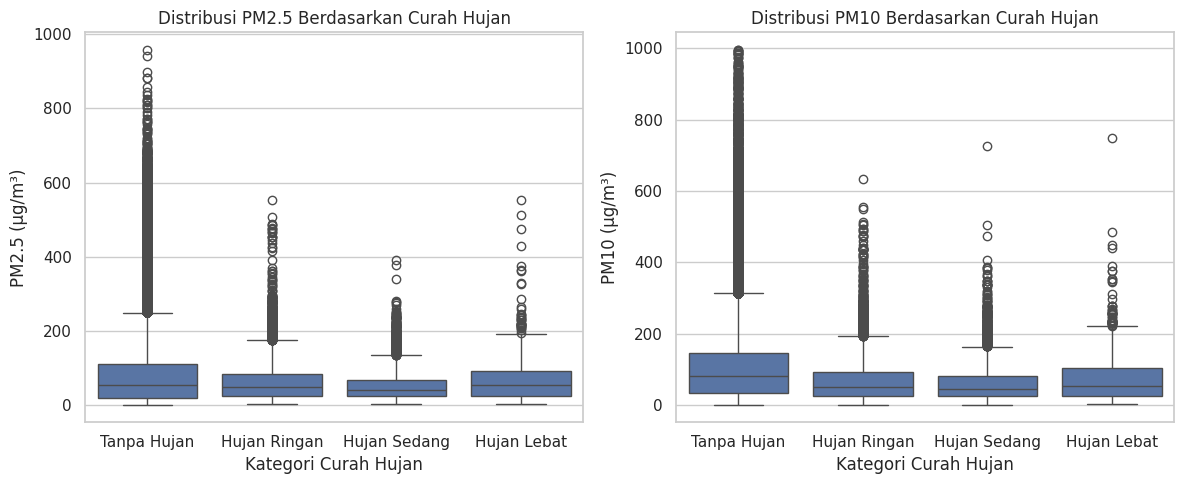



Korelasi antara Temperatur dan polutan:
            TEMP     PM2.5      PM10        O3
TEMP   1.000000 -0.132235 -0.095908  0.580708
PM2.5 -0.132235  1.000000  0.879144 -0.138581
PM10  -0.095908  0.879144  1.000000 -0.098445
O3     0.580708 -0.138581 -0.098445  1.000000
*Jika suhu berhubungan positif dengan O3, artinya semakin panas suhu udara,
 semakin tinggi kadar ozon. Namun, jika PM2.5 dan PM10 berhubungan negatif
 dengan suhu, ini bisa berarti udara panas membantu menyebarkan polutan.



Apakah arah angin mempengaruhi polusi udara dengan membantu menyebarkan polutan?

     wd      PM2.5        PM10
0     E  99.560198  122.368990
1   ENE  96.151793  117.659086
2   ESE  99.900826  123.608142
3     N  65.946258   88.171615
4    NE  84.650068  105.042755
5   NNE  69.619095   89.319134
6   NNW  52.510132   75.459029
7    NW  50.360896   76.662086
8     S  87.208225  114.624870
9    SE  94.522353  121.661142
10  SSE  91.227213  119.469634
11  SSW  82.157692  111.775158
12   SW  77.662

In [45]:
city_avg = df_clean.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

print(city_avg)

city_avg_melted = city_avg.melt(id_vars='station', value_vars=['PM2.5', 'PM10'],
                                var_name='Polutan', value_name='Rata-Rata Konsentrasi')
print("\n")
print(city_avg_melted)

bins = [-0.01, 0, 1, 5, np.inf]
labels = ['Tanpa Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat']
df_clean['RAIN_category'] = pd.cut(df_clean['RAIN'], bins=bins, labels=labels)

agg_data = df_clean.groupby('RAIN_category', observed=True)[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP']].mean().reset_index()

print("\n")
print(agg_data)

correlation_co_o3 = df_clean['CO'].corr(df_clean['O3'])
print("\n")
print("Korelasi antara CO dan O3:\n", correlation_co_o3)
print("*Semakin tinggi konsentrasi CO, maka konsentrasi O3 semakin rendah\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_clean, x='RAIN_category', y='PM2.5')
plt.xlabel("Kategori Curah Hujan")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Distribusi PM2.5 Berdasarkan Curah Hujan")

plt.subplot(1,2,2)
sns.boxplot(data=df_clean, x='RAIN_category', y='PM10')
plt.xlabel("Kategori Curah Hujan")
plt.ylabel("PM10 (µg/m³)")
plt.title("Distribusi PM10 Berdasarkan Curah Hujan")

plt.tight_layout()
plt.show()


correlation_temp = df_clean[['TEMP', 'PM2.5', 'PM10', 'O3']].corr()
print("\n")
print("Korelasi antara Temperatur dan polutan:\n", correlation_temp)
print("*Jika suhu berhubungan positif dengan O3, artinya semakin panas suhu udara,\n semakin tinggi kadar ozon. Namun, jika PM2.5 dan PM10 berhubungan negatif\n dengan suhu, ini bisa berarti udara panas membantu menyebarkan polutan.\n")


wind_pollution = df_clean.groupby('wd')[['PM2.5', 'PM10']].mean().reset_index()
print("\n")
print("Apakah arah angin mempengaruhi polusi udara dengan membantu menyebarkan polutan?\n")
print(wind_pollution)


correlation_pres = df_clean[['PRES', 'PM2.5', 'PM10']].corr()
print("\n")
print("Korelasi antara tekanan udara dan polutan:\n", correlation_pres)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Wilayah mana saja kah yang memiliki kualitas udara terbaik hingga terburuk?

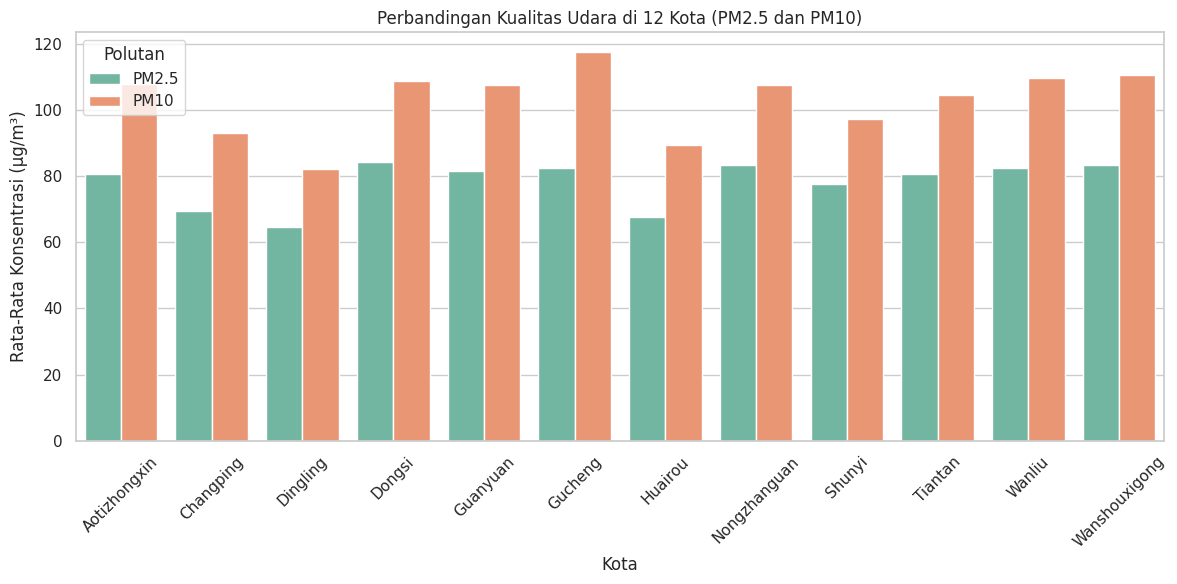

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='Rata-Rata Konsentrasi', hue='Polutan', data=city_avg_melted, palette='Set2')
plt.xlabel("Kota")
plt.ylabel("Rata-Rata Konsentrasi (µg/m³)")
plt.title("Perbandingan Kualitas Udara di 12 Kota (PM2.5 dan PM10)")
plt.xticks(rotation=45)
plt.legend(title="Polutan")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah intensitas hujan mempengaruhi kualitas udara

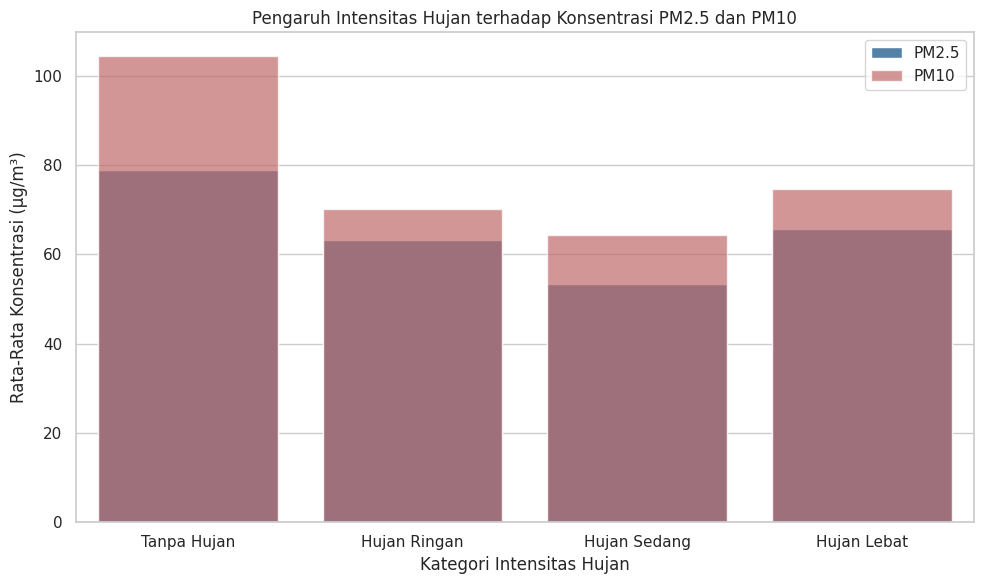

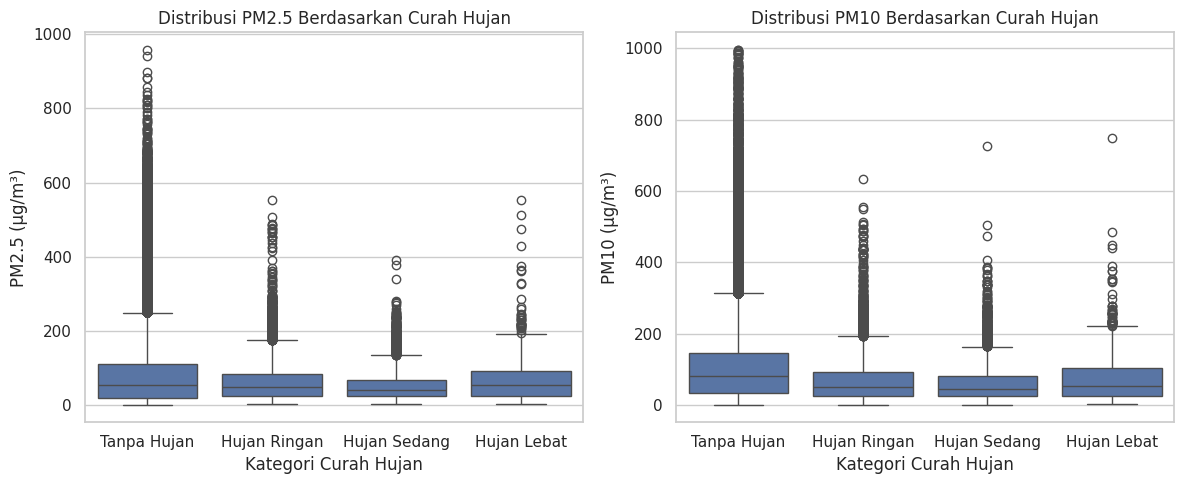

In [46]:
plt.figure(figsize=(10, 6))

sns.barplot(x='RAIN_category', y='PM2.5', data=agg_data, color='steelblue', label='PM2.5')

sns.barplot(x='RAIN_category', y='PM10', data=agg_data, color='indianred', alpha=0.7, label='PM10')

plt.xlabel("Kategori Intensitas Hujan")
plt.ylabel("Rata-Rata Konsentrasi (µg/m³)")
plt.title("Pengaruh Intensitas Hujan terhadap Konsentrasi PM2.5 dan PM10")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_clean, x='RAIN_category', y='PM2.5')
plt.xlabel("Kategori Curah Hujan")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Distribusi PM2.5 Berdasarkan Curah Hujan")

plt.subplot(1,2,2)
sns.boxplot(data=df_clean, x='RAIN_category', y='PM10')
plt.xlabel("Kategori Curah Hujan")
plt.ylabel("PM10 (µg/m³)")
plt.title("Distribusi PM10 Berdasarkan Curah Hujan")

plt.tight_layout()
plt.show()

**Insight:**
- Pada explorasi pertama, ditampilkan perbandingan rata-rata kualitas hujan di setiap distrik dimana distrik Gucheng menempati posisi distrik dengan kualitas udara terburuk khususnya pada polutan PM10 dan distrik Wanshouxigong pada polutan PM2.5
- Pada explorasi kedua, menampilkan bagaimana intensitas hujan sangat amat berpengaruh pada kualitas udara, ditandai dengan semakin tingginya intensitas hujan, semakin rendah juga polutan yang ada.

## Analisis Lanjutan (Opsional)

Ciri-ciri Cluster Berdasarkan O3:
  O3_Cluster   Count  Mean_PM25  Median_PM25   Mean_NO2
0        Low  230685  94.508626         68.0  65.279046
1   Moderate  118585  47.099467         23.0  30.432040
2       High   39691  69.808685         51.0  32.609714
3  Very High   18445  81.593673         69.0  30.199327
4    Extreme   13358  92.794281         85.0  27.560591


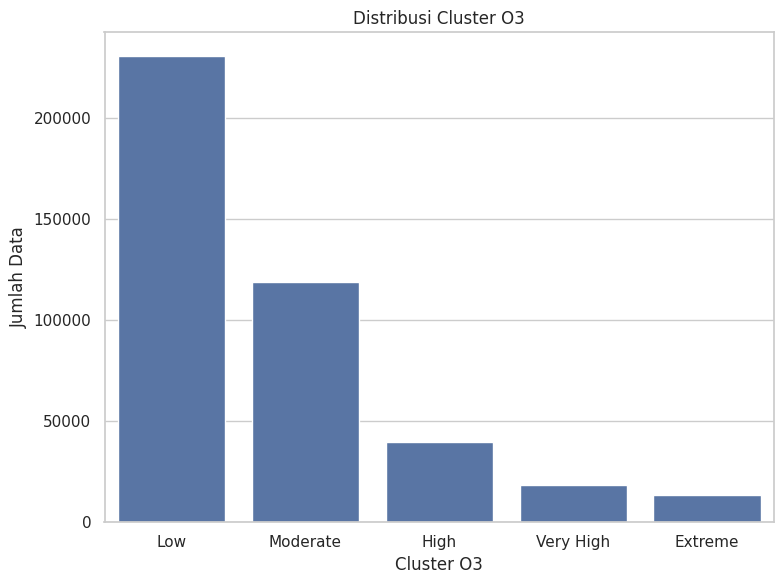

In [54]:
bins_o3 = [0, 50, 100, 150, 200, np.inf]
labels_o3 = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

df_clean['O3_Cluster'] = pd.cut(df_clean['O3'], bins=bins_o3, labels=labels_o3, right=False)

cluster_characteristics = df_clean.groupby('O3_Cluster', observed=True).agg(
    Count=('O3', 'count'),
    Mean_PM25=('PM2.5', 'mean'),
    Median_PM25=('PM2.5', 'median'),
    Mean_NO2=('NO2', 'mean')
).reset_index()

print("Ciri-ciri Cluster Berdasarkan O3:")
print(cluster_characteristics)

plt.figure(figsize=(8,6))
sns.countplot(x='O3_Cluster', data=df_clean, order=labels_o3,  legend=False)
plt.xlabel("Cluster O3")
plt.title("Distribusi Cluster O3")
plt.xlabel("Cluster O3")
plt.ylabel("Jumlah Data")
plt.tight_layout()
plt.show()

## Conclusion

**Conclusion Pertanyaan 1: Perbandingan Kualitas Udara Antar Daerah**

Kualitas udara pada tiap-tiap daerah memiliki perbedaan nilai yang cukup beragam, khususnya ditandai dengan polutan udara PM2.5 dan PM10. Berdasarkan data rata-rata konsentrasi polutan, terdapat beberapa poin penting:
  1. Distrik Gucheng menempati posisi pertama sebagai distrik dengan kualitas udara terkotor, ditandai dengan intensitas polutan PM10 yang mencapai **117.635638** dan PM2.5 mencapai **82.362514**.
  2. Distrik Dingling menempati posisi terbaik dengan kualitas udara yang relatif lebih bersih, di mana konsentrasi PM2.5 tercatat sebesar **64.590090** dan PM10 sebesar **82.285318**. Hal ini menunjukkan adanya variasi yang signifikan antar distrik, sehingga kebijakan penanganan polusi udara perlu disesuaikan dengan kondisi di tiap daerah.



---


**Conclusion Pertanyaan 2: Pengaruh Faktor Meteorologi Terhadap Kualitas Udara**

Dari analisis korelasi dan agregasi berdasarkan kategori intensitas hujan, didapatkan kesimpulan bahwa faktor meteorologi memiliki peran yang signifikan dalam mempengaruhi kualitas udara:
  1. Faktor seperti suhu, kelembapan, dan tekanan udara menunjukkan korelasi yang signifikan dengan tingkat polusi udara. Data juga mengungkapkan bahwa kondisi tanpa hujan cenderung memiliki konsentrasi polutan yang lebih tinggi (PM2.5 sekitar 78.90 dan PM10 sekitar 104.48), sedangkan kehadiran hujan (baik hujan ringan, sedang, maupun lebat) diikuti dengan penurunan konsentrasi polutan.
  2. Dengan demikian, fenomena hujan tidak hanya berperan dalam proses pembersihan partikel di atmosfer, tetapi juga menegaskan pentingnya kondisi meteorologi dalam memitigasi dampak polusi udara.